In [1]:
import os
import jieba
import jieba.analyse

jieba_dir = 'jieba-src'
article_dir = 'articles'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
# 設定詞庫
### 繁體字較完整詞庫
### https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
file_path = os.path.join(jieba_dir, 'dict.txt')
jieba.set_dictionary(file_path)
# 載入自定義詞庫
jieba.load_userdict(file_path)
# 加入字詞
# jieba.add_word(word, freq=None, tag=None)
# jieba.add_word('武漢肺炎')
# 刪除字詞
# jieba.del_word(word)

Building prefix dict from /mnt/d/1st-PyCrawlerMarathon-Project-Cupoy/jieba-src/dict.txt ...
Loading model from cache /tmp/jieba.u02972dcbbb28591066fc0f9351fda71f.cache
Loading model cost 1.651 seconds.
Prefix dict has been built successfully.


In [3]:
# jieba.cut  回傳 generator，要用for loop 取值
# jieba.lcut 回傳 list，可直接取用
# 全模式
# seg_list = jieba.cut(text, cut_all=True)
# seg_list = jieba.lcut(text, cut_all=True)
# 默認模式
# seg_list = jieba.cut(text, cut_all=False)
# seg_list = jieba.lcut(text, cut_all=False)

seg_list = []
overall_text = ''
for filename in os.listdir(article_dir):
    with open (os.path.join(article_dir, filename), 'r') as f_:
        text = f_.read()
        overall_text = ' '.join([overall_text, text])
        seg_list += jieba.lcut(text, cut_all=False)

print(seg_list)

', '宣布', '，', '國內', '第', '10', '例', '新型', '冠狀', '病毒', '確診', '個案', '臨床', '症狀', '改善', '、', '三套', '採檢', '皆', '呈現', '陰性', '，', '目前', '恢復', '狀況', '良好', '，', '經由', '專家', '會議', '評估', '後', '，', '最', '快', '今日', '可', '解除', '隔離', '限制', '，', '可望', '於', '近日', '內', '出院', '。', '\n', '\n', '錄音檔', '提供', '指揮', '中心', ' ', '罹患', '新冠', '肺炎', '痊癒', '者', '真情', '告白', '\n', '\n', '國內', '第', '10', '例', '個案', '以', '錄音檔', '提供', '指揮', '中心', '，', '敘述', '返台', '後', '從', '太太', '確診', '到', '自身', '也', '確診', '被', '隔離', '的', '過程', '中', '，', '醫療團隊', '除了', '提供', '專業', '的', '治療', '照護', '外', '，', '也', '時常', '給予', '支持', '與', '鼓勵', '，', '並對', '此表', '達', '最大', '的', '感謝', '與', '敬意', '。', '\n', '\n', '「', '我', '不', '勇敢', '誰', '幫', '你', '堅強', '！', '」', '誠如', '台灣', '出現', '第一位', '病例', '的', '病友', '所言', '，', '沒有', '任', '何一', '個', '人', '真的', '想要', '生病', '。', '當我', '看到', '陳', '部長', '在', '記者會', '上', '哽咽', '落淚', '的', '那一刻', '，', '我', '忍不住', '心中', '滿滿', '的', '感慨', '，', '我要', '第', '一線', '向', '所有', '防疫', '人員', '說聲', '：', '「', '你們', '辛苦', '了', 

In [4]:
def remove_stop_words(file_name,seg_list):
  with open(file_name,'r') as f:
    stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]

    new_list = []
    for seg in seg_list:
        if seg in ['\n', ' ']:
            continue
        if seg not in stop_words:
            new_list.append(seg) #若在for loop裡用remove的話則會改變總長度

    return new_list


file_name = os.path.join(jieba_dir, 'stop_words.txt')
new_seg_list = remove_stop_words(file_name,seg_list)

print(new_seg_list)

, '消失', '研究', '發現', '家庭', '支持', '提供', '保護', '因子', '降低', '受', '隔離', '身心', '壓力', '特別', 'SARS', '六個', '月', '發現', '107', '位', '隔離', '身心', '狀態', '對照組', '122', '位', '醫護', '人員', '來得', '健康', '顯示', '劑量', '壓力', '可能', '心理', '精神', '相對', '增強', 'SARS', '病房', '憂鬱症', '發生率', '比非', 'SARS', '病房', '高出', '13', '倍', '第二個', '研究', 'SARS', '盛行', '時', 'SARS', '病房', '分為', '病房', 'ICU', '重症', '病房', '直接', '照顧', '病患', '70', '位', '醫護', '人員', '進行', '為期', '月', '身心', '狀態', '評估', '以非', 'SARS', '病房', '分為', '病房', 'ICU', '重症', '病房', '32', '位', '醫護', '人員', '做為', '對照組', '發現', 'SARS', '病房', '憂鬱症', '發生率', '比非', 'SARS', '病房', '高出', '13', '倍', '失眠', '發生率', '高出', '倍', '進一步', '觀察', '發現', 'SARS', '病房', '醫護', '人員', '工作', '月', '之後', 'SARS', '知識', '經驗', '逐漸', '增加', '情緒', '失眠', 'SARS', '負面', '感受', '隨之', '降低', '心理', '層面', '漸漸', '適應', '血液', '壓力', '激素', '皮質', '醇', '濃度', '月', '逐漸', '恢復', '正常', '顯示', '疫病', '流行', '時', '組織', '工作', '環境', '條理', '分明', '照護', '步驟', '避免', '感染', '增加', '安全', '保護', '最佳', '良方', '推薦', '閱讀', '消毒液', '分裝', '學問', '材質', '不能',

In [5]:
# 統計詞頻
import pandas as pd
def count_segment_freq(seg_list):
  seg_df = pd.DataFrame(seg_list,columns=['seg'])
  seg_df['count'] = 1
  sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
  sef_freq = pd.DataFrame(sef_freq)
  return sef_freq
sef_freq = count_segment_freq(new_seg_list)
sef_freq.head(20)

,count
seg,
中國,569
年,559
月,513
-,482
說,479
沒有,464
更,418
台灣,390
時,378


In [6]:
# 停用詞詞庫
#https://raw.githubusercontent.com/tomlinNTUB/Python/master/%E4%B8%AD%E6%96%87%E5%88%86%E8%A9%9E/%E5%81%9C%E7%94%A8%E8%A9%9E.txt
file_name = os.path.join(jieba_dir, 'stop_words.txt')
jieba.analyse.set_stop_words(file_name)
'''
註: 經測試過後發現，設定停用詞詞庫後，並不會直接應用在jieba.cut(精準模式)裡。查詢後發現，網路上亦有其他人提出相同問題。上述之解決辦法雖稱可使用 jieba 提供的   ChineseAnalyzer 處理，但經過測試後發現結果與 jieba.cut(全模式)相同。因此，若需要針對文章去除停留詞，可能須另寫函式處理。
上述敘述為筆者實測結果。若內容有誤，還請通知，謝謝。
'''

'\n註: 經測試過後發現，設定停用詞詞庫後，並不會直接應用在jieba.cut(精準模式)裡。查詢後發現，網路上亦有其他人提出相同問題。上述之解決辦法雖稱可使用 jieba 提供的   ChineseAnalyzer 處理，但經過測試後發現結果與 jieba.cut(全模式)相同。因此，若需要針對文章去除停留詞，可能須另寫函式處理。\n上述敘述為筆者實測結果。若內容有誤，還請通知，謝謝。\n'

In [7]:
# 分析關鍵詞
'''
計算TF-IDF分數，並依重要性排列
詞頻(Term Frequency, TF)是指說計算各個分詞在文章中出現的頻率
逆向檔案頻率(Inverse Document Frequency, IDF)是指說計算分詞在各個文章中出現的頻率
TF-IDF即為將TF分數與IDF分數相乘後的值進行比較，若分數越高，則該字詞重要性越大
Jieba 有提供 IDF 的語料庫，也可以透過jieba.analyse中的set_idf_path(file_name)做更改
'''
topK = 200
file_name = os.path.join(jieba_dir, 'idf.txt.big')
jieba.analyse.set_idf_path(file_name)
tags_idf = jieba.analyse.extract_tags(overall_text, topK=topK, withWeight=True, allowPOS=('n', 'ns', 'v', 'vn', 'an'))
tags_idf = {tag: freq for tag, freq in tags_idf}
tags_idf

{'可能': 0.1337649816500959,
 '工作': 0.11962411216137148,
 '使用': 0.09745734377364129,
 '生活': 0.09210674450763746,
 '病毒': 0.09019581619835038,
 '政府': 0.07834806068077045,
 '表示': 0.07605494670962595,
 '孩子': 0.07299746141476662,
 '肺炎': 0.07256284452008696,
 '疫情': 0.0723859716637468,
 '研究': 0.0634428198683312,
 '知道': 0.06306063420647379,
 '日本': 0.05847440626418478,
 '全球': 0.05427036398375319,
 '口罩': 0.050066321703321606,
 '方式': 0.049301950379606774,
 '能力': 0.04777320773217711,
 '看到': 0.04662665074660485,
 '金融': 0.04624446508474744,
 '合作': 0.040511680156886186,
 '造成': 0.040511680156886186,
 '科技': 0.040511680156886186,
 '安全': 0.040511680156886186,
 '推出': 0.04012949449502877,
 '希望': 0.03974730883317135,
 '中心': 0.038600751847599105,
 '防疫': 0.038600751847599105,
 '想要': 0.038600751847599105,
 '疾病': 0.03821856618574169,
 '指出': 0.03707200920016943,
 '病例': 0.03554326655273977,
 '增加': 0.03516108089088235,
 '平台': 0.03516108089088235,
 '不能': 0.0340145239053101,
 '人生': 0.03248578125788043,
 '越南': 0.031339

In [8]:
tags_rank = jieba.analyse.textrank(overall_text, topK=topK, withWeight=True, allowPOS=('n', 'ns', 'v', 'vn', 'an'))
tags_rank = {tag: freq for tag, freq in tags_rank}
tags_rank

{'可能': 1.0,
 '肺炎': 0.8986664788758144,
 '疫情': 0.8609966965431306,
 '工作': 0.8132346534677105,
 '病毒': 0.7532384229839827,
 '使用': 0.7370116659188607,
 '公司': 0.7211825227600223,
 '政府': 0.7042194004830016,
 '需要': 0.6138676560152143,
 '生活': 0.6064785943213404,
 '孩子': 0.5754554760353251,
 '日本': 0.5261751947968969,
 '提供': 0.50081649054171,
 '表示': 0.4917394034183009,
 '金融': 0.4844397808911965,
 '方式': 0.4663663420148571,
 '中心': 0.4653980935804411,
 '研究': 0.46424302735972944,
 '全球': 0.4463757384740456,
 '能力': 0.41022894454994024,
 '世界': 0.4067852270270223,
 '需求': 0.39641885820743344,
 '科技': 0.3955977390172449,
 '安全': 0.3843953641204188,
 '口罩': 0.3761348526118471,
 '確診': 0.37300209448018434,
 '是否': 0.3717464400830394,
 '感染': 0.3634566546398002,
 '造成': 0.3576343073813714,
 '管理': 0.3575933763262173,
 '不能': 0.35606732140815095,
 '平台': 0.3528964094895038,
 '知道': 0.3474146895611103,
 '看到': 0.3357744618809801,
 '病例': 0.329538131939969,
 '越南': 0.32497428453263144,
 '防疫': 0.3185207189982813,
 '合作': 0.3075

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


wc = WordCloud(background_color='black', 
               font_path=os.path.join(jieba_dir, 'NotoSansTC-Medium.otf'))

wc.generate_from_frequencies(tags_idf)
wc.to_file('wordcloud_idf.png')

wc.generate_from_frequencies(tags_rank)
wc.to_file('wordcloud_rank.png')

In [20]:
import os
from PIL import Image

import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


# load image. This has been modified in gimp to be brighter and have more saturation.
custom_color = np.array(Image.open(os.path.join('jieba-src', "python-logo.svg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
custom_color = custom_color[::3, ::3]

# create mask  white is "masked out"
custom_mask = custom_color.copy()
custom_mask[custom_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(custom_mask[:, :, i] / 255., 2) for i in range(3)], axis=0)
custom_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
# wc = WordCloud(mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)
wc = WordCloud(mask=custom_mask, width=600, height=600,
               font_path=os.path.join(jieba_dir, 'NotoSansTC-Medium.otf'))

# generate word cloud
wc.generate_from_frequencies(tags_idf)


# create coloring from image
image_colors = ImageColorGenerator(custom_color)
wc.recolor(color_func=image_colors)
wc.to_file('wordcloud_idf_mask.png')


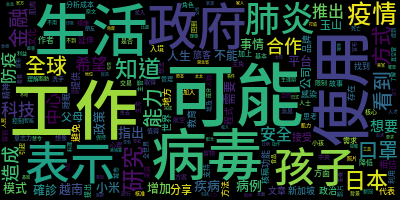

In [21]:
from IPython.display import Image
Image(filename='wordcloud_idf.png')

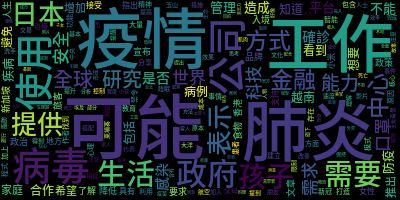

In [22]:
Image(filename='wordcloud_rank.png')

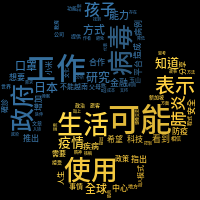

In [23]:
Image(filename='wordcloud_idf_mask.png')